# Homework 4

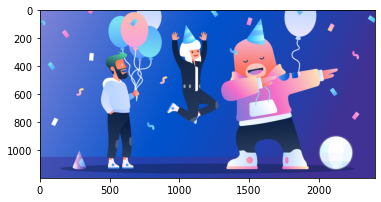

In [32]:
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

def AffineExample(data, degrees):
    theta = degrees * np.pi/180 # 11 degrees in radians
    mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta/4), np.cos(theta)]])
    data2 = nd.affine_transform(data, mat)
    return data2

def RPolar(data, pxy):
    ndx = np.indices(data.shape)
    v,h = data.shape
    a = ndx[1].astype(float)
    a = a / h * 2 * np.pi
    y = ndx[0] * np.cos(a)
    x = ndx[0] * np.sin(a)
    ndx[0] = x.astype(int) + pxy[0]
    ndx[1] = y.astype(int) + pxy[1]
    answ = nd.map_coordinates(data, ndx)
    return answ

# IRPolar defined as follows
def IRPolar(rpdata, pxy):
    ndx = np.indices(rpdata.shape)
    ndx[0] -= pxy[0]
    ndx[1] -= pxy[1]
    v,h = rpdata.shape
    r = np.sqrt(ndx[0]**2 + ndx[1]**2)
    theta = np.arctan2(-ndx[0], -ndx[1] )/2/np.pi*h
    ndx[0] = r.astype(int) 
    ndx[1] = theta.astype(int) + h/2 
    answ = nd.map_coordinates(rpdata, ndx)
    answ[pxy[0],pxy[1]:] = answ[pxy[0]-1,pxy[1]:]
    return answ

# LogPolar defined as follows
def LogPolar(data, pxy):
    ndx = np.indices(data.shape)
    v,h = data.shape
    a = ndx[1].astype(float)
    a = a / h * 2 * np.pi
    r = np.exp( ndx[0]/v * np.log(v/2))-1.0
    y = r * np.cos(a)
    x = r * np.sin(a)
    ndx[0] = x.astype(int) + pxy[0]
    ndx[1] = y.astype(int) + pxy[1]
    answ = nd.map_coordinates(data, ndx)
    return answ

file = 'image.png'
img = imageio.imread(file)
plt.imshow(img, cmap='gray')
plt.show()

<br><br>

1. With an image of your choosing, write a script to shift a grayscale image 10 pixels to the right.

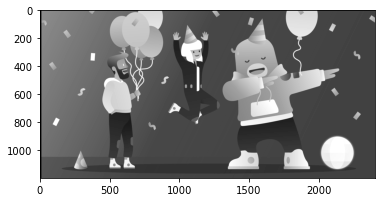

In [5]:
img = imageio.imread(file, as_gray=True)
img = nd.shift(img, (0,10))
plt.imshow(img, cmap='gray')
plt.show()

<br><br>
 
2.  Write a script that will rotate the color image of the bird $45^\circ$ counter clockwise with no reshaping.  What is the shape of the new image?

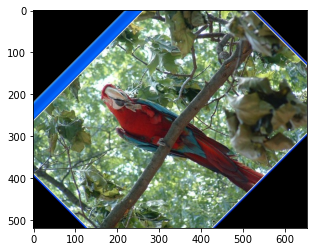

In [7]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
img = imageio.imread(url)
img = nd.rotate(img, 45, reshape=False)
plt.imshow(img)
plt.show()

<i>The new shape is octogonal<i>

<br><br>

3.  Repeat the processing in #2.  This time with reshaping.  What is the shape of the resulting image?  Why is there a difference?

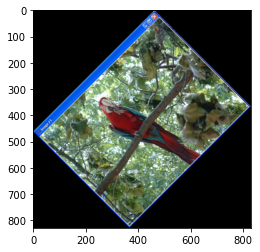

In [10]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
img = imageio.imread(url)
img = nd.rotate(img, 45, reshape=True)
plt.imshow(img)
plt.show()

<i> The new shape is the same: rectangular. The Reason the shape is different in this scenario from the other is because the last rotation shifted the image so it didn't fit in the recatngular shape it used to fit in

<br><br>

4.  Using the alien image from the binary dialation example, perform an erosion.  Use the same iterations as done earlier to create bmg and cmg.  Create a new image, dmg, based on adding the original image with bmg and subtracting cmg.  Subtract the original image from dmg.  Show all resulting images.

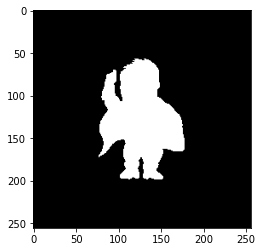

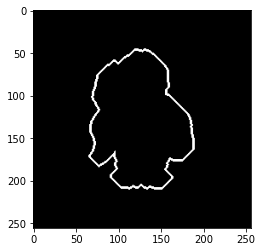

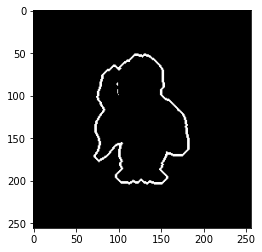

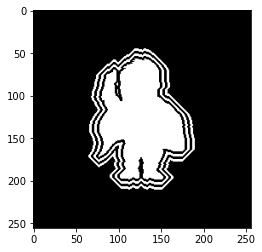

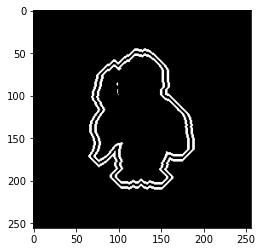

In [19]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/alien73.png'
amg = imageio.imread(url,as_gray=True) < 100  #  set to 1 all of the pixels that originally have a value less than 100

bmg = nd.binary_dilation(amg, iterations=12) ^ nd.binary_dilation(amg, iterations=9)
cmg = nd.binary_dilation(amg, iterations=6) ^ nd.binary_dilation(amg, iterations=3)

dmg = (amg + bmg) ^ cmg
emg = dmg ^ amg

for img in [amg, bmg, cmg, dmg, emg]:
    plt.imshow(img, cmap='gray')
    plt.show()

<br><br>

5.   Using the clock image and code for the rpolar, irpolar and log polar plots, shift the center of rotation to (200, 200).  Describe your interpretation of the results.  Describe what happends if we shift the center of rotation to (400,400).

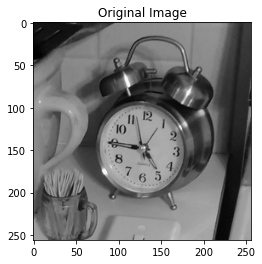

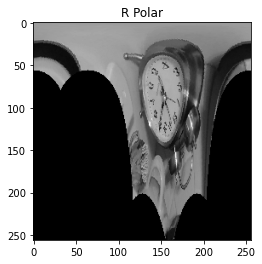

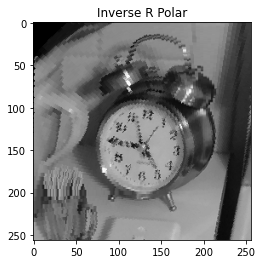

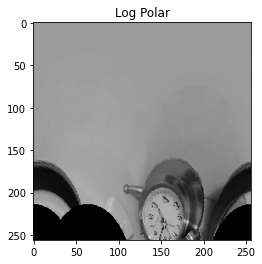

In [28]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/clock.png'
adata = imageio.imread(url,as_gray=True)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

RPimg = RPolar(adata, (200, 200))
plt.title('R Polar')
plt.imshow(RPimg, cmap='gray')
plt.show()

IRPimg = IRPolar(RPimg, (200, 200))
plt.title('Inverse R Polar')
plt.imshow(IRPimg, cmap='gray')
plt.show()

LPimg = LogPolar(adata, (200, 200))
plt.title('Log Polar')
plt.imshow(LPimg, cmap='gray')
plt.show()

<i> From these images, it looks like the functions do not seem to do anything useful. Even though they make interesting pictures, warping the entire image around a single point does not have any apparent use to me. However, I do know that I don't know everything, and I'm sure there is a use for this. 
    
If the center was at (400,400), we wuld be centering on a portion of the image that does not exist and therefore would lose most of the useful data in the image.

<br><br>

6.  Create an image with an affine transformation of 45 degrees and 90 degrees.  Explain the 90 degree result.

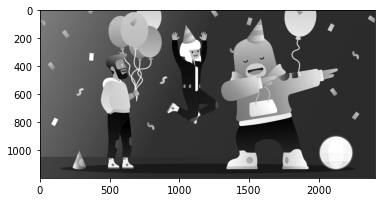

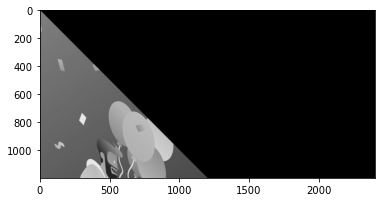

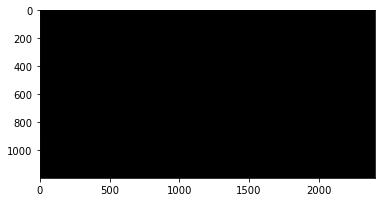

In [35]:
file = 'image.png'
img = imageio.imread(file, as_gray = True)
plt.imshow(img, cmap='gray')
plt.show()

img_45 = AffineExample(img, 45)
img_90 = AffineExample(img, 90)

plt.imshow(img_45, cmap='gray')
plt.show()
plt.imshow(img_90, cmap='gray')
plt.show()

<i> The affine result looks the way it does because the affine function has warped the image from a plane into a line segment, which we cannot see with our bare eyes